# Bài 11: Practice 1

In [ ]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
def vertical_bar_plot(data, y, x, title, ylabel, xlabel, number_format):
    
    fig, ax = plt.subplots(figsize = (10, data[x].count()))
    
    sns.barplot(
        y = y
        , x = x
        , palette = [
            '#468bcc' \
            if i < max(data[x].tolist()) \
            else '#014d8c' \
            for i in data[x].tolist()\
        ]
        , alpha = .66
        , data = data
        , ax = ax
    )

    ax.set_title(f'{title}'
                 , loc = 'left'
                 , fontsize = 16
                 , fontweight = 600
                 , fontstyle = 'italic'
                )
    
    ax.set(ylabel = f'{ylabel}'
           , xlabel = f'{xlabel}'
          )
    
    max_xtick_value = data[x].max() * 1.25
    min_xtick_value = data[x].min() * 1.25
    
    if data[x].min() >= 0:
        ax.set_xticks([0
                       , .2 * max_xtick_value
                       , .4 * max_xtick_value
                       , .6 * max_xtick_value
                       , .8 * max_xtick_value
                       , max_xtick_value
                      ])
    else:
        if data[x].max() > 0:
            xtick_range = max_xtick_value - min_xtick_value
            ax.set_xticks([min_xtick_value
                           , min_xtick_value + .2 * xtick_range
                           , min_xtick_value + .4 * xtick_range
                           , min_xtick_value + .6 * xtick_range
                           , min_xtick_value + .8 * xtick_range
                           , max_xtick_value
                          ])
        else:
            ax.set_xticks([min_xtick_value
                           , .8 * min_xtick_value
                           , .6 * min_xtick_value
                           , .4 * min_xtick_value
                           , .2 * min_xtick_value
                           , 0
                          ])
    
    # Show value on bars, I copied the following code:
    initialx = 0
    for p in ax.patches:    
        ax.text(p.get_width()
                , initialx + p.get_height()/8
                , (number_format).format(p.get_width())
               )
        initialx += 1
    
    plt.tight_layout()
    plt.show()

### 1. Load data
- Load file `superstore_sales.xlsx` vào biến `df`

In [ ]:
# Get data path & data name
data_path = 'D:\\codegym\\data\\'
data_name = 'superstore_sales.xls'

In [ ]:
df = pd.read_excel(data_path + data_name)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 2. Inspect data

- Show 3 dòng đầu

- Show 3 dòng cuối

- Data có bao nhiêu dòng, bao nhiêu cột?

- In ra list tên các cột

- Kiểu dữ liệu của từng cột

### 3. Transform cột


#### 3.1. Đổi tên cột

- Biến tên cột về dạng chữ thường và snake_case

In [ ]:
new_cols = []
for _ in df.columns.tolist():
    new_cols += [re.sub('[ -]','_', _).strip().lower()]
    
new_cols

['row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit']

In [ ]:
new_cols = [re.sub('[ -]','_',_).strip().lower() for _ in df.columns.tolist()] # List comprehension
df.columns = new_cols

- In ra 1 dòng đầu để kiểm tra

In [ ]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


#### 3.2. Đổi về datetime

- Chọn ra cột mà tên có chứa `date` và kiểm tra dtype của chúng

In [ ]:
col_contain_date = []

for _ in df.columns.tolist():
    if 'date' in _:
        col_contain_date += [_]
        
col_contain_date

['order_date', 'ship_date']

- Nếu chưa ở dạng datetime thì đổi thành datetime. Nếu đã ở dạng datetime thì vẫn cứ đổi lại để practice.

In [ ]:
# List comprehension
col_contain_date = [_ for _ in df.columns.tolist() if 'date' in _]
col_contain_date

['order_date', 'ship_date']

- Kiểm tra kết quả sau khi đổi

In [ ]:
for _ in col_contain_date:
    print('Column {} has type: {}'.format(_, df[_].dtypes))

Column order_date has type: datetime64[ns]
Column ship_date has type: datetime64[ns]


### 4. Trả lời các câu hỏi khác

#### 4.1. Distinct values

- Có bao nhiêu nước và là những nước nào?

- Có bao nhiêu categories và là những categories nào?

- Có bao nhiêu subcategories và là những subcategories nào?

- Tương tự có bao nhiêu `city`, `region`, `state`, `ship_mode`, `segment` (gợi ý dùng `for`)

#### 4.2. Làm việc với ngày tháng

- Data chứa các order trong khoảng thời gian nào?

In [ ]:
min_order_date = df['order_date'].min().strftime('%Y-%m-%d')
max_order_date = df['order_date'].max().strftime('%Y-%m-%d')

In [ ]:
print('Data chứa các order trong khoảng thời gian từ {} đến {}.'.format(min_order_date, max_order_date))

Data chứa các order trong khoảng thời gian từ 2014-01-03 đến 2017-12-30.


- Mỗi năm có bao nhiêu order (sắp xếp theo thứ tự các năm tăng dần)?

In [ ]:
df['year'] = df['order_date'].dt.year

In [ ]:
order_by_years = df.groupby(['year'])['order_id'].nunique().reset_index()

In [ ]:
order_by_years.dtypes

year        int32
order_id    int64
dtype: object

In [ ]:
order_by_years['year'] = order_by_years['year'].astype(str)

In [ ]:
order_by_years

,year,order_id
0,2014,969
1,2015,1038
2,2016,1315
3,2017,1687


In [ ]:
order_by_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      4 non-null      object
 1   order_id  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


- Vẽ đồ thị cho thống kê trên

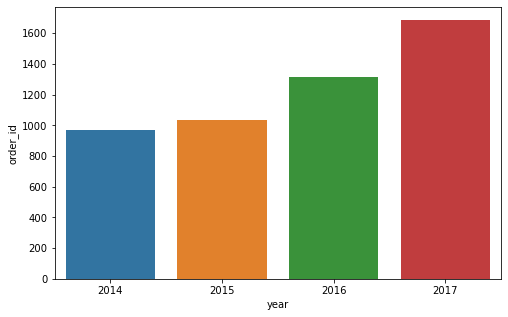

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    y = 'order_id'
    ,x = 'year'
    ,data = order_by_years
    ,ax = ax
)
plt.show()

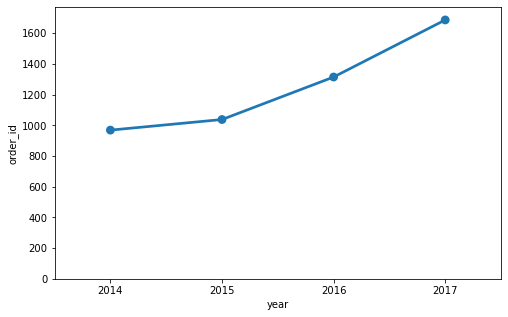

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.pointplot(
    y = 'order_id'
    ,x = 'year'
    ,data = order_by_years
    ,ax = ax
)
ax.set_ylim(0, order_by_years['order_id'].max() * 1.05)
plt.show()

- Mỗi tháng có bao nhiêu order?

In [ ]:
df['month'] = df['order_date'].dt.month

In [ ]:
year_month_order = df.groupby(['year','month'])['order_id'].nunique().reset_index()

In [ ]:
year_month_order

,year,month,order_id
0,2014,1,32
1,2014,2,28
2,2014,3,71
3,2014,4,66
4,2014,5,69
5,2014,6,66
6,2014,7,65
7,2014,8,72
8,2014,9,130
9,2014,10,78


In [ ]:
year_month_order['year_month'] = year_month_order['year'].astype(str) +"-"+year_month_order['month'].astype(str)

In [ ]:
year_month_order

,year,month,order_id,year_month
0,2014,1,32,2014-1
1,2014,2,28,2014-2
2,2014,3,71,2014-3
3,2014,4,66,2014-4
4,2014,5,69,2014-5
5,2014,6,66,2014-6
6,2014,7,65,2014-7
7,2014,8,72,2014-8
8,2014,9,130,2014-9
9,2014,10,78,2014-10


In [73]:
color_list = ['#DE8DF5', '#32FCED', '#00C2B6', '#008B81']
year_conds = [year_month_order['year'] ==  2014
              ,year_month_order['year'] ==  2015
              ,year_month_order['year'] ==  2016
              ,year_month_order['year'] ==  2017]

year_month_order['year_colors'] = np.select(year_conds, color_list, default = np.nan)
year_month_order

,year,month,order_id,year_month,year_colors,even_odd_year
0,2014,1,32,2014-1,#DE8DF5,even
1,2014,2,28,2014-2,#DE8DF5,even
2,2014,3,71,2014-3,#DE8DF5,even
3,2014,4,66,2014-4,#DE8DF5,even
4,2014,5,69,2014-5,#DE8DF5,even
5,2014,6,66,2014-6,#DE8DF5,even
6,2014,7,65,2014-7,#DE8DF5,even
7,2014,8,72,2014-8,#DE8DF5,even
8,2014,9,130,2014-9,#DE8DF5,even
9,2014,10,78,2014-10,#DE8DF5,even


- Vẽ plot cho data trên (bar, line)

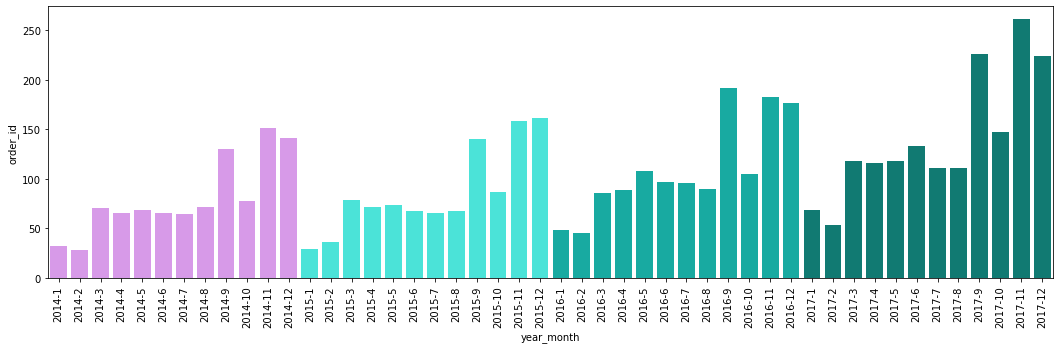

In [78]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(
    y = 'order_id'
    ,x = 'year_month'
    ,data = year_month_order
    ,ax = ax
    ,palette = year_month_order['year_colors'].tolist()
)
ax.set_xticklabels(year_month_order['year_month'].tolist(), rotation = 90)
plt.show()

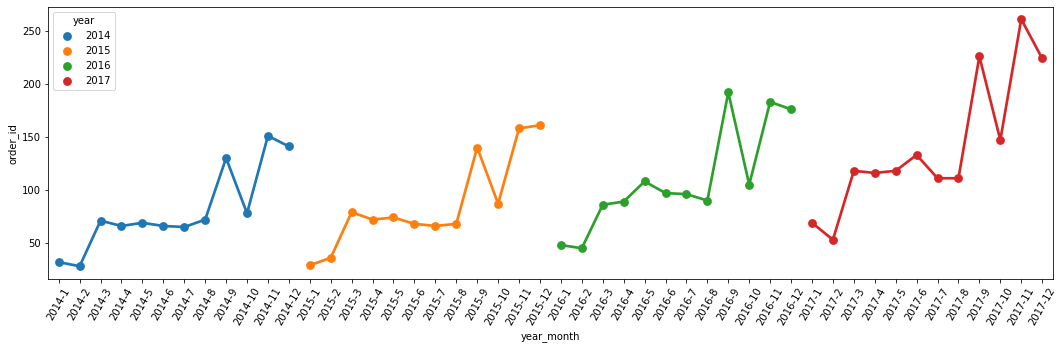

In [80]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(
    y = 'order_id'
    ,x = 'year_month'
    ,data = year_month_order
    ,ax = ax
    ,hue = 'year'
)
ax.set_xticklabels(year_month_order['year_month'].tolist(), rotation = 60)
plt.show()

- Vẽ barplot như trên nhưng alternate màu của 2 năm liên tiếp

In [37]:
year_month_order['even_odd_year'] = np.where(year_month_order['year'] % 2 == 0,'even','odd')

In [38]:
year_month_order

,year,month,order_id,year_month,year_colors,even_odd_year
0,2014,1,32,2014-1,#845EC2,even
1,2014,2,28,2014-2,#845EC2,even
2,2014,3,71,2014-3,#845EC2,even
3,2014,4,66,2014-4,#845EC2,even
4,2014,5,69,2014-5,#845EC2,even
5,2014,6,66,2014-6,#845EC2,even
6,2014,7,65,2014-7,#845EC2,even
7,2014,8,72,2014-8,#845EC2,even
8,2014,9,130,2014-9,#845EC2,even
9,2014,10,78,2014-10,#845EC2,even


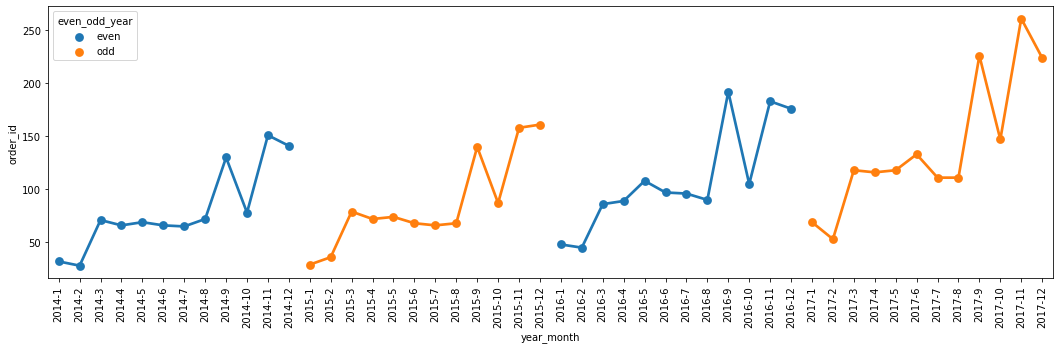

In [39]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(
    y = 'order_id'
    ,x = 'year_month'
    ,data = year_month_order
    ,ax = ax
    ,hue = 'even_odd_year'
)
xlabels = [i for i in year_month_order['year_month'].tolist()]
ax.set_xticklabels(xlabels, rotation = 90)
plt.show()

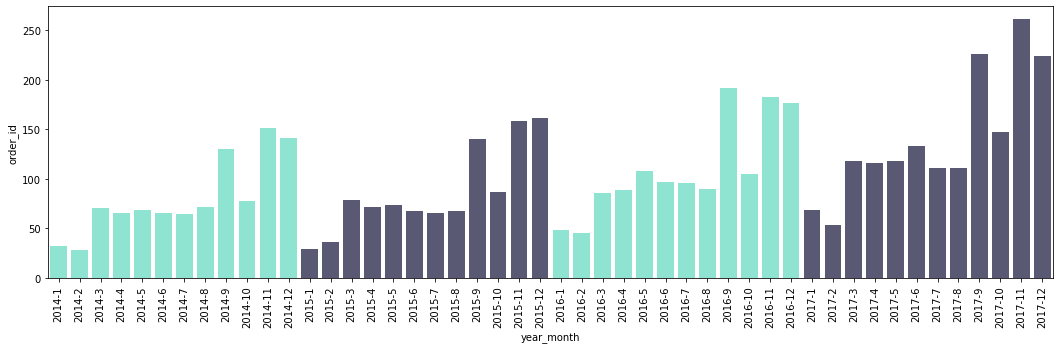

In [40]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(
    y = 'order_id'
    ,x = 'year_month'
    ,data = year_month_order
    ,ax = ax
    ,palette = ['#80F2D8' if _ == 'even' else '#545479' for _ in year_month_order['even_odd_year'].tolist()]
)
xlabels = [i for i in year_month_order['year_month'].tolist()]
ax.set_xticklabels(xlabels, rotation = 90)
plt.show()

- Như yêu cầu trên nhưng vẽ line plot (gợi ý, dùng `sns.pointplot`)

### 4.3. Doanh thu

- Lấy ra các đơn hàng của năm 2017

In [42]:
year_2017_cond = df['year'] == 2017
year_2017_df = df.loc[year_2017_cond, :]
year_2017_df['year'].unique()

array([2017])

- Có bao nhiêu đơn hàng?

In [43]:
year_2017_df['order_id'].nunique()

1687

- Số đơn hàng mỗi tháng?

In [44]:
year_2017_df.groupby(['month'])['order_id'].nunique()

month
1      69
2      53
3     118
4     116
5     118
6     133
7     111
8     111
9     226
10    147
11    261
12    224
Name: order_id, dtype: int64

- Lấy ra top 10 sản phẩm có doanh số cao nhất 2017

In [87]:
top_10_2017 = year_2017_df.groupby(['product_name'])['sales'].sum().nlargest(10).reset_index()

In [88]:
top_10_2017

,product_name,sales
0,Canon imageCLASS 2200 Advanced Copier,35699.898
1,Martin Yale Chadless Opener Electric Letter Op...,11825.902
2,GBC DocuBind TL300 Electric Binding System,10943.278
3,Hewlett Packard LaserJet 3310 Copier,9239.846
4,Samsung Galaxy Mega 6.3,9239.780
5,Cubify CubeX 3D Printer Triple Head Print,7999.980
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,7371.742
7,HON 5400 Series Task Chairs for Big and Tall,7220.094
8,GBC DocuBind P400 Electric Binding System,7077.148
9,Lexmark MX611dhe Monochrome Laser Printer,5609.967


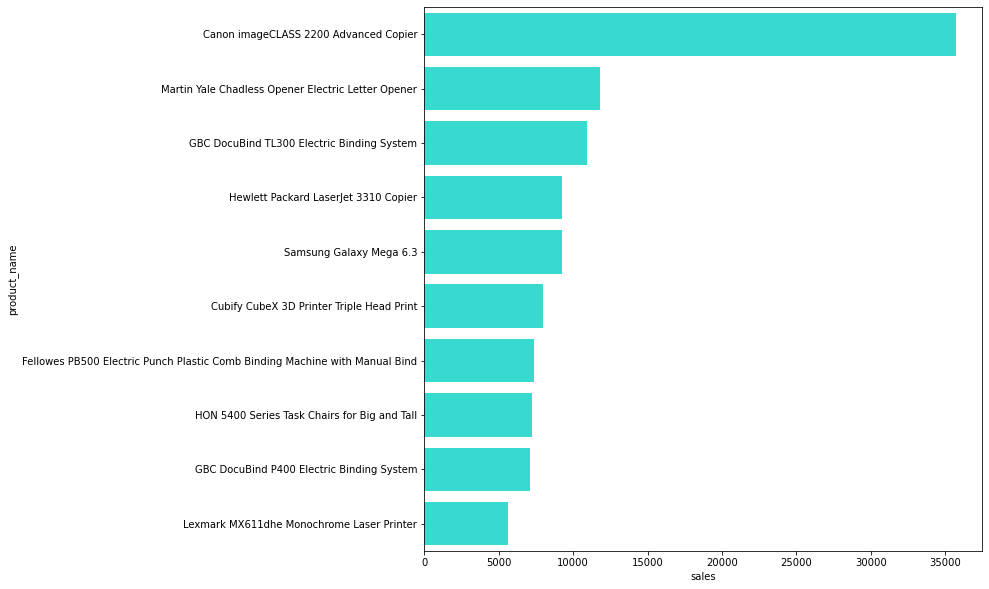

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(
    x = 'sales'
    ,y = 'product_name'
    ,data = top_10_2017
    ,ax = ax
    ,color = '#1DF5E7'
)
plt.show()

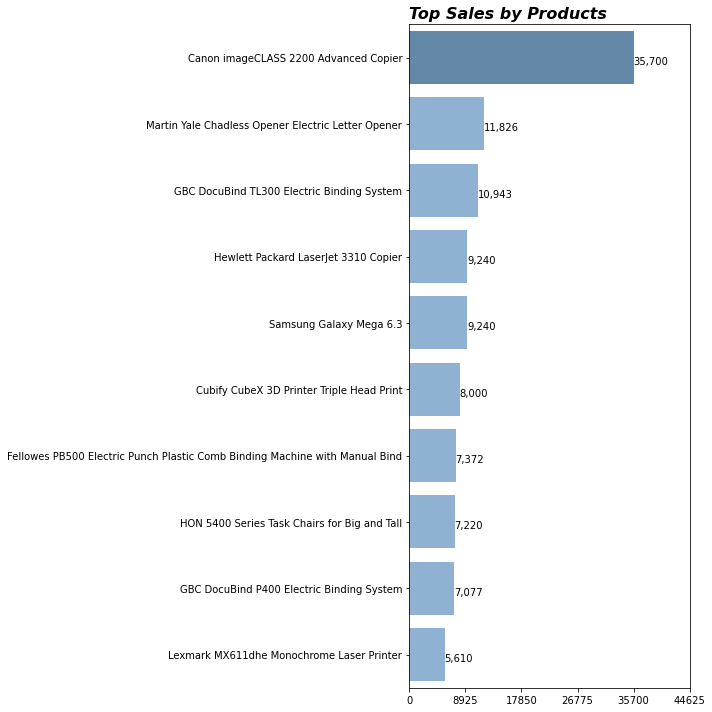

In [90]:
vertical_bar_plot(data = top_10_2017
                  , y = 'product_name'
                  , x = 'sales'
                  , title = 'Top Sales by Products'
                  , ylabel = ''
                  , xlabel = ''
                  , number_format = '{:,.0f}')

- Lấy ra top 10 như trên nhưng tô màu theo category

In [36]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11


In [37]:
top_10_2017 = pd.merge(top_10_2017,df
                       ,how = 'left'
                       ,on = ['product_name'])
top_10_2017.head()

,product_name,sales_x,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,...,region,product_id,category,sub_category,sales_y,quantity,discount,profit,year,month
0,Canon imageCLASS 2200 Advanced Copier,35699.898,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,...,East,TEC-CO-10004722,Technology,Copiers,11199.968,4,0.2,3919.9888,2017,10
1,Canon imageCLASS 2200 Advanced Copier,35699.898,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,...,East,TEC-CO-10004722,Technology,Copiers,10499.970,3,0.0,5039.9856,2017,11
2,Canon imageCLASS 2200 Advanced Copier,35699.898,6426,CA-2016-143714,2016-05-23,2016-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,...,East,TEC-CO-10004722,Technology,Copiers,8399.976,4,0.4,1119.9968,2016,5
3,Canon imageCLASS 2200 Advanced Copier,35699.898,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,...,Central,TEC-CO-10004722,Technology,Copiers,17499.950,5,0.0,8399.9760,2016,10
4,Canon imageCLASS 2200 Advanced Copier,35699.898,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,...,West,TEC-CO-10004722,Technology,Copiers,13999.960,4,0.0,6719.9808,2017,3


In [38]:
top_10_2017['category'].unique()

array(['Technology', 'Office Supplies', 'Furniture'], dtype=object)

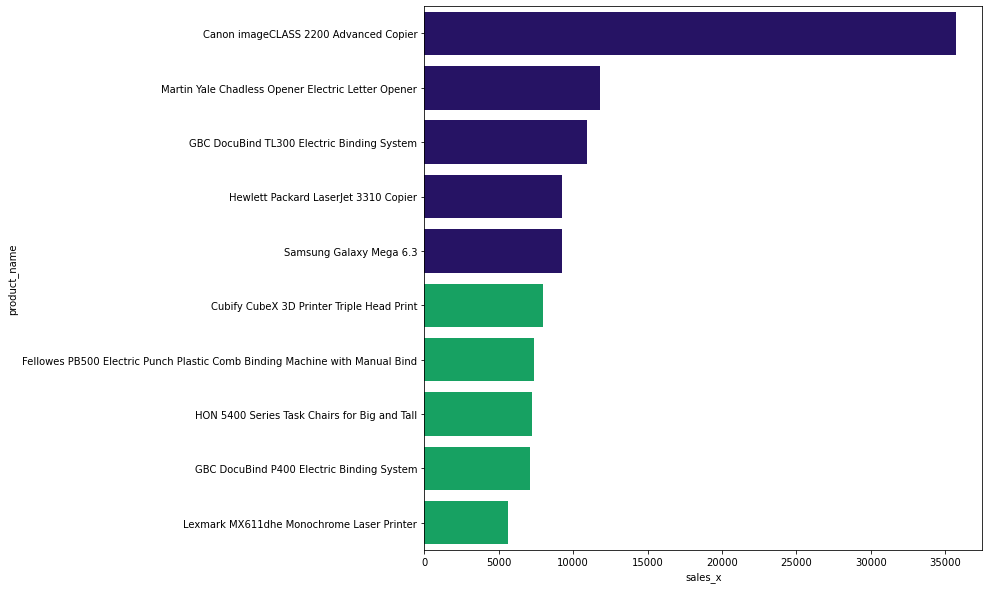

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(
    x = 'sales_x'
    ,y = 'product_name'
    ,data = top_10_2017
    ,ax = ax
    ,palette = ['#1f0671' if _ == 'Technology' \
                else '#b1033b' if _ == 'Furniture'\
                else '#00b864'
                for _ in top_10_2017['category']])
plt.show()

- Lọc ra top 5 sub-categories có Sales nhiều nhất trong năm 2017

In [40]:
year_2017_cond = df['year'] == 2017
year_2017_df = df.loc[year_2017_cond, :]

In [41]:
top_10_2017 = year_2017_df.groupby(['product_name'])['sales'].sum().nlargest(5).reset_index()
top_10_2017

,product_name,sales
0,Canon imageCLASS 2200 Advanced Copier,35699.898
1,Martin Yale Chadless Opener Electric Letter Op...,11825.902
2,GBC DocuBind TL300 Electric Binding System,10943.278
3,Hewlett Packard LaserJet 3310 Copier,9239.846
4,Samsung Galaxy Mega 6.3,9239.780


In [42]:
top_10_2017['year'] = 2017
top_10_2017

,product_name,sales,year
0,Canon imageCLASS 2200 Advanced Copier,35699.898,2017
1,Martin Yale Chadless Opener Electric Letter Op...,11825.902,2017
2,GBC DocuBind TL300 Electric Binding System,10943.278,2017
3,Hewlett Packard LaserJet 3310 Copier,9239.846,2017
4,Samsung Galaxy Mega 6.3,9239.780,2017


- Vẽ barplot cho sales của 5 sub-categories theo từng năm từ năm 2014-2017

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [92]:
sorted(df['year'].unique().tolist())

[2014, 2015, 2016, 2017]

In [96]:
result_4_years = pd.DataFrame()
for _ in sorted(df['year'].unique().tolist()):
    year_cond = df['year'] == _
    year_df = df.loc[year_cond, :]
    top_5 = year_df.groupby(['sub_category'])['sales'].sum().nlargest(5).reset_index()
    top_5['year'] = _
    
    result_4_years = pd.concat([result_4_years, top_5])
result_4_years

,sub_category,sales,year
0,Phones,77390.8060,2014
1,Chairs,77241.5760,2014
2,Machines,62023.3730,2014
3,Storage,50329.0420,2014
4,Tables,46088.3655,2014
0,Chairs,71734.5290,2015
1,Phones,68313.7020,2015
2,Storage,45048.2480,2015
3,Accessories,40523.9600,2015
4,Tables,39150.4235,2015


In [103]:
result_4_years['year_sub_category'] = result_4_years['year'].astype(str) + "-" + result_4_years['sub_category']

In [104]:
result_4_years

,sub_category,sales,year,year_sub_category
0,Phones,77390.8060,2014,2014-Phones
1,Chairs,77241.5760,2014,2014-Chairs
2,Machines,62023.3730,2014,2014-Machines
3,Storage,50329.0420,2014,2014-Storage
4,Tables,46088.3655,2014,2014-Tables
0,Chairs,71734.5290,2015,2015-Chairs
1,Phones,68313.7020,2015,2015-Phones
2,Storage,45048.2480,2015,2015-Storage
3,Accessories,40523.9600,2015,2015-Accessories
4,Tables,39150.4235,2015,2015-Tables


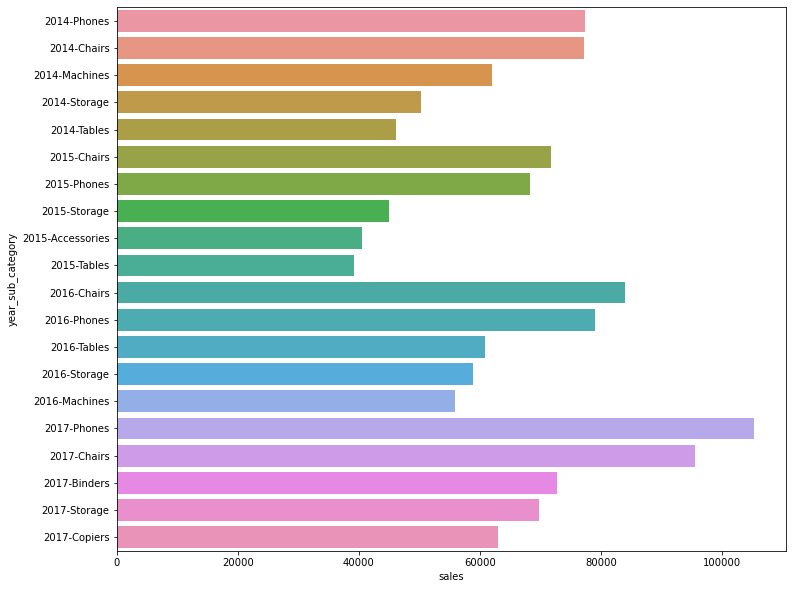

In [105]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(
    x = 'sales'
    ,y = 'year_sub_category'
    ,data = result_4_years
    ,ax = ax
)
plt.show()

In [108]:
color_list = ['#1DF5E7', '#5DF6CF', '#86F6B8', '#A9F5A4']
year_conds = [result_4_years['year'] ==  2014
              ,result_4_years['year'] ==  2015
              ,result_4_years['year'] ==  2016
              ,result_4_years['year'] ==  2017]

result_4_years['year_colors'] = np.select(year_conds, color_list, default = np.nan)
result_4_years

,sub_category,sales,year,year_sub_category,year_colors
0,Phones,77390.8060,2014,2014-Phones,#1DF5E7
1,Chairs,77241.5760,2014,2014-Chairs,#1DF5E7
2,Machines,62023.3730,2014,2014-Machines,#1DF5E7
3,Storage,50329.0420,2014,2014-Storage,#1DF5E7
4,Tables,46088.3655,2014,2014-Tables,#1DF5E7
0,Chairs,71734.5290,2015,2015-Chairs,#5DF6CF
1,Phones,68313.7020,2015,2015-Phones,#5DF6CF
2,Storage,45048.2480,2015,2015-Storage,#5DF6CF
3,Accessories,40523.9600,2015,2015-Accessories,#5DF6CF
4,Tables,39150.4235,2015,2015-Tables,#5DF6CF


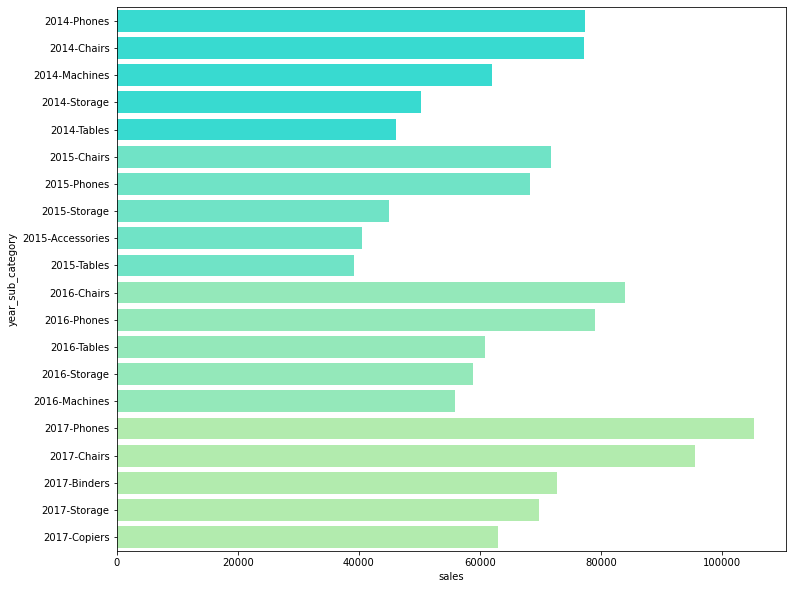

In [109]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(
    x = 'sales'
    ,y = 'year_sub_category'
    ,data = result_4_years
    ,ax = ax
    ,palette = result_4_years['year_colors'].tolist()
)
plt.show()

- Vẽ boxplot của doanh số daily từng category theo các năm

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

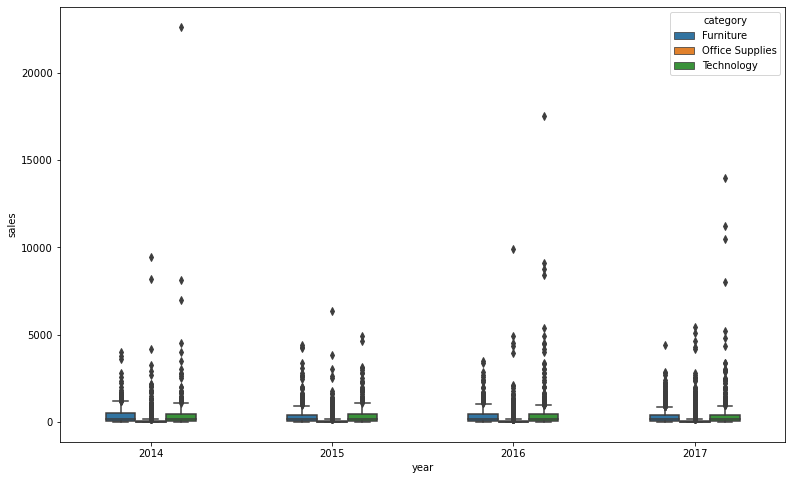

In [111]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.boxplot(
    x="year",
    y="sales",
    hue='category',
    data=df,
    width=0.5,
    ax=ax
)

plt.show()

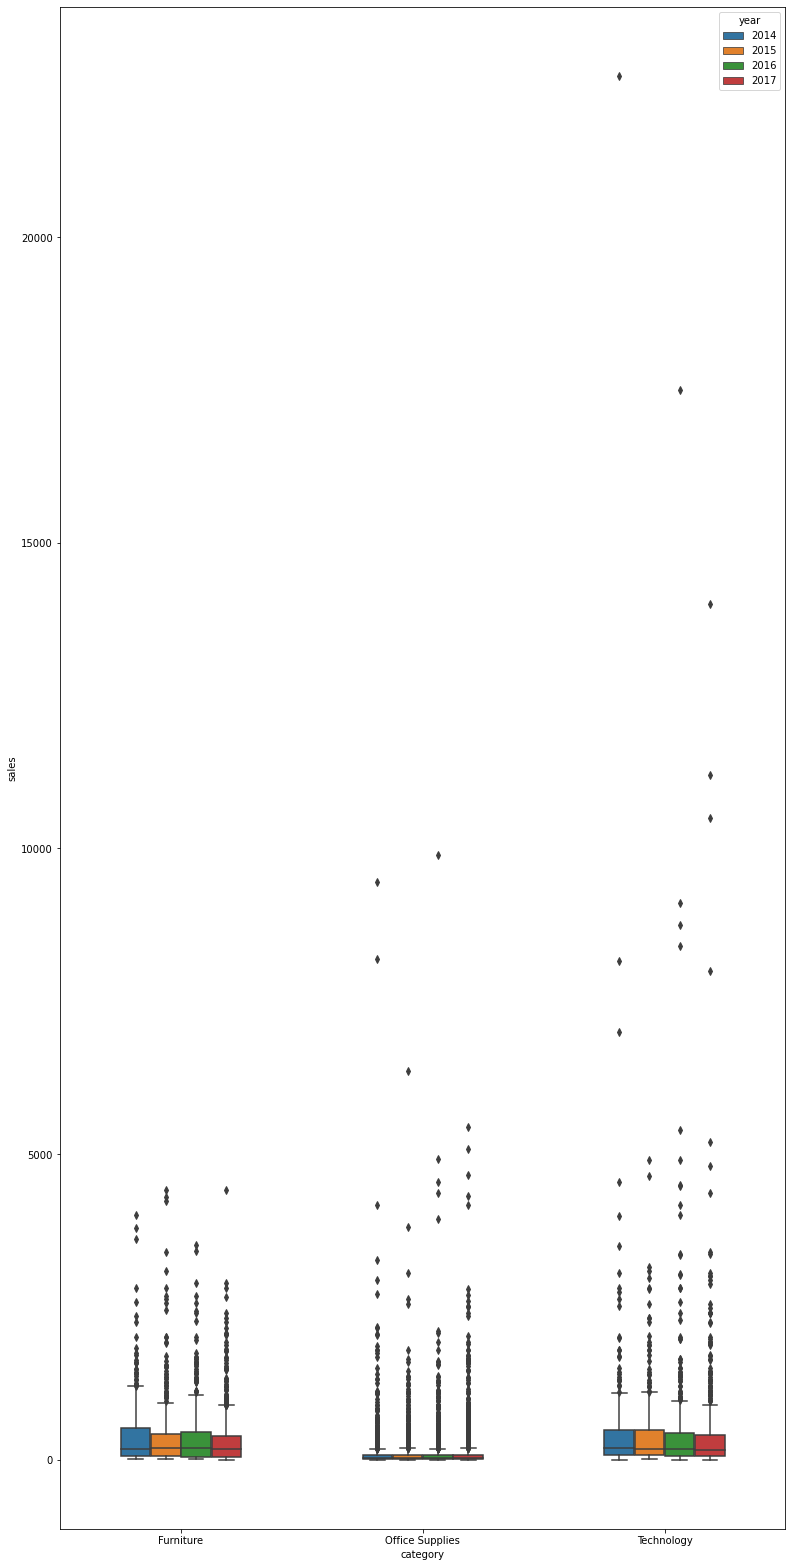

In [114]:
fig, ax = plt.subplots(figsize=(13, 28))
sns.boxplot(
    hue="year",
    y="sales",
    x='category',
    data=df,
    width=0.5,
    ax=ax
)

plt.show()

- Vẽ KDE của doanh số daily từng category theo các năm

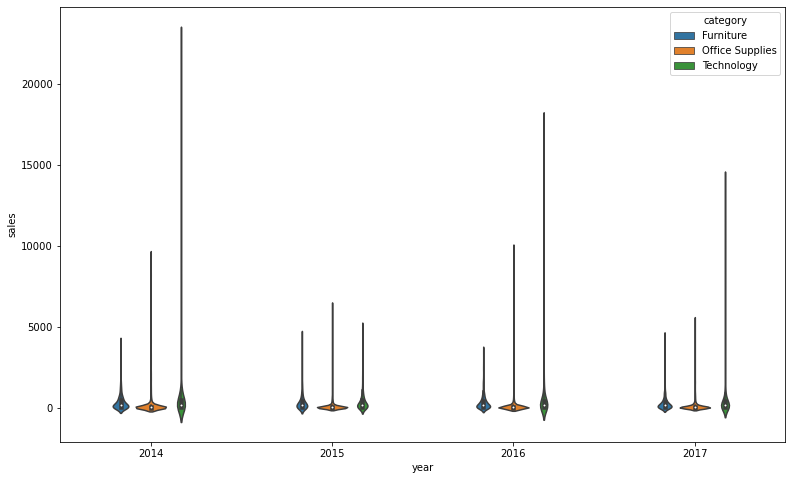

In [115]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.violinplot(
    x="year",
    y="sales",
    hue='category',
    data=df,
    width=0.5,
    ax=ax
)

plt.show()

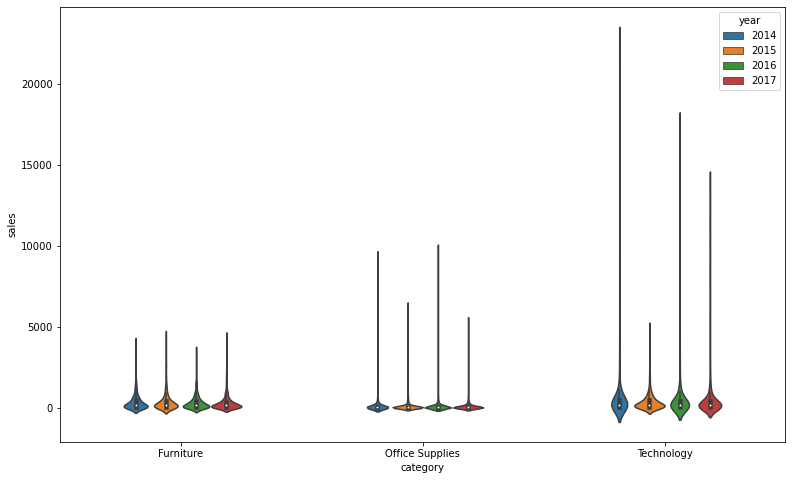

In [116]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.violinplot(
    hue="year",
    y="sales",
    x='category',
    data=df,
    width=0.5,
    ax=ax
)

plt.show()

- Vẽ daily sales against daily quantity

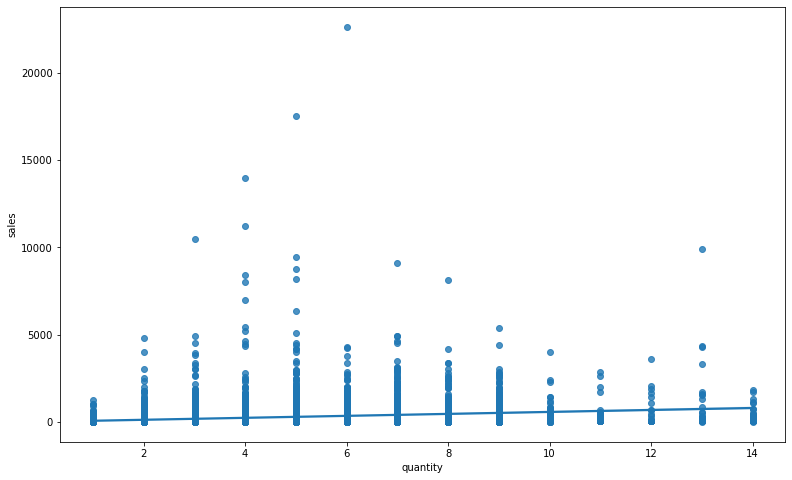

In [117]:
fig, ax = plt.subplots(figsize=(13, 8))

sns.regplot(
    x="quantity",
    y="sales",
    data=df,
    ax=ax
)

plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [65]:
np.corrcoef(df["sales"], df["quantity"])

array([[1.        , 0.20079477],
       [0.20079477, 1.        ]])

- Vẽ daily sales against daily quantity (từ category ra riêng từng subplots)

In [118]:
by_cate = df.loc[:,['category', 'sales', 'quantity']]
by_cate.sample(10)

,category,sales,quantity
9815,Office Supplies,173.488,7
7266,Office Supplies,13.428,3
5232,Office Supplies,27.496,7
340,Office Supplies,17.856,4
7297,Office Supplies,77.240,5
6755,Furniture,47.400,5
2856,Furniture,1603.136,4
2997,Furniture,3.984,1
1164,Office Supplies,25.320,5
7233,Furniture,113.600,8


In [69]:
by_cate.groupby(['category'])[['sales', 'quantity']].corr()

sales  quantity
category                                    
Furniture       sales     1.000000  0.437464
                quantity  0.437464  1.000000
Office Supplies sales     1.000000  0.159608
                quantity  0.159608  1.000000
Technology      sales     1.000000  0.206949
                quantity  0.206949  1.000000

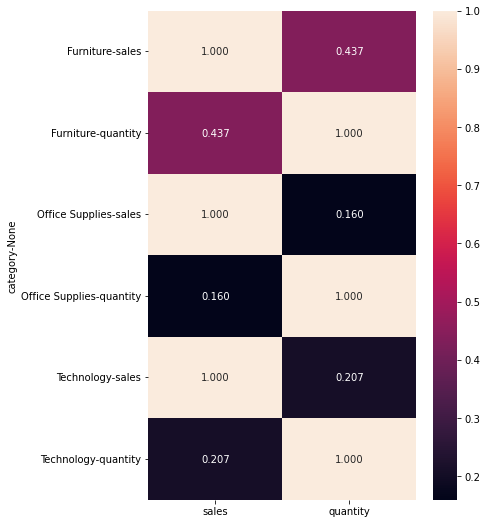

In [127]:
fig, ax = plt.subplots(figsize = (6, 9))
sns.heatmap(by_cate.groupby(['category'])[['sales', 'quantity']].corr()
            , fmt=".3f"
            , annot = True
            , ax = ax
            # , vmin = 0
            # , vmax = 1
            , xticklabels = ['sales', 'quantity'])

plt.show()

- Lọc ra các đơn hàng bị chuyển chậm hơn 3 ngày

- Có bao nhiêu đơn như vậy

- Đơn hàng trễ nhất là bao lâu?

- Vẽ boxplot thời gian chờ cho từng `region`

- Vẽ boxplot thời gian chờ cho từng `ship_mode`

- Điều chỉnh lại subplots trên sao cho box xếp theo thứ tự `Same day`, `First Class`, `Second Class`, `Standard Class`